In [1]:
H0km = 67.6
ΩΛ = 0.69
Ωm = 0.31


In [2]:
import cosmolopy.distance as cd
cosmo = {'omega_M_0' : Ωm, 'omega_lambda_0' : ΩΛ, 'h' : H0km/100}
cosmo = cd.set_omega_k_0(cosmo)

data2 = []

z = 0
pc2ly = 3.261564
while z < 10:
    dL = cd.luminosity_distance(z, **cosmo)  # * pc2ly
    
    data2.append([z, dL])
    
    z += 0.1

In [3]:
import math
data = []

z = 0
pc2ly = 3.261564
while z < 10:
    dL = 299792/70 * (1+z) * math.log(1+z) #  * pc2ly
    
    data.append([z, dL])
    
    z += 0.1

/tmp/ipykernel_16716/2241436729.py:9: RuntimeWarning: invalid value encountered in double_scalars
  datad.append(data2[i][1] / data[i][1])


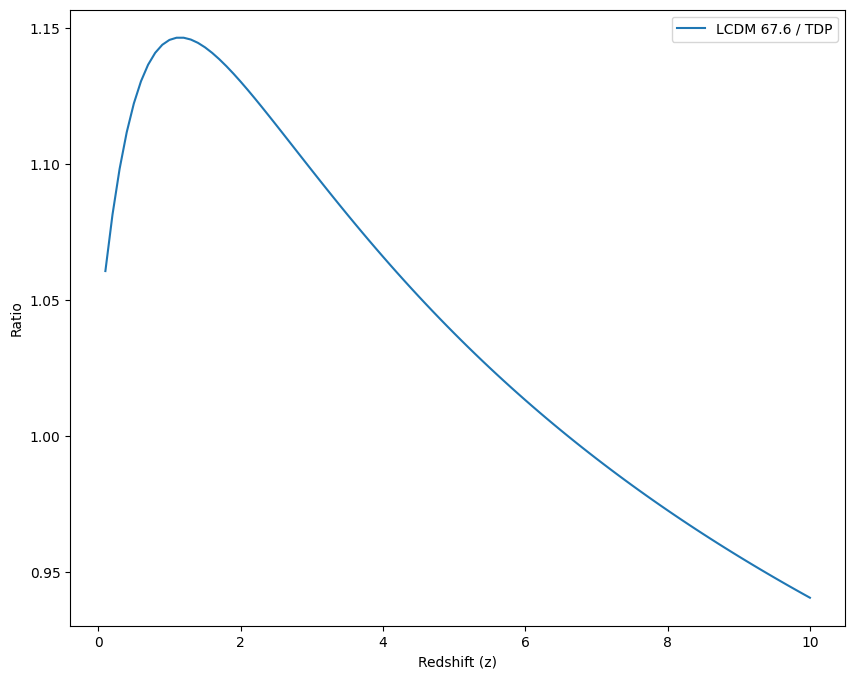

In [4]:
import matplotlib.pyplot as plt

dataz = [row[0] for row in data] 
datad1 = [row[1] for row in data] 
datad2 = [row[1] for row in data2] 
dataz = [row[0] for row in data] 
datad = []
for i in range(len(data)):
    datad.append(data2[i][1] / data[i][1])
    
plt.figure(figsize=(10,8))
    
plt.plot(dataz, datad, label = "LCDM 67.6 / TDP")
#plt.plot(dataz, datad1, label = "TDP")
#plt.plot(dataz, datad2, label = "LCDM 67.6")

plt.xlabel("Redshift (z)")
plt.ylabel("Ratio")
#plt.ylabel("Luminosity distance (Mpc)")
plt.legend()

plt.savefig('lcdm676tdpr.png',  bbox_inches='tight')
plt.show()